# Pytorch Workflow

Let's explore an example of end-to-end PyTorch workflow

In [1]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import numpy as np
import torch
from torch import nn # nn contains all of  pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check pytorch version and gpu
torch.__version__, torch.cuda.is_available()

('1.13.0', True)

## 1. Data (preparing and loading)

Data can be almost anything... in machine learning
* Excel spreadsheet
* Image of any kind
* Videos (YouTube has  lots of data)
* Audio like songs or podcasts
* DNA
* Text

Mahine learning is a game of two parts:
1. Get data into numerical representation.
2. Build a model to learn pattersn in that numerical representation.


To showcase this, let's create some *known* data using Linaer regression formula.

We'll use a linear regression formula to make a straight line with known **parameters**.

In [3]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create 
start = 0 
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data.

In [5]:
# Create a train test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize the data


This is where the data explorer motto comes in
`Visualize , Visualize and Visualize`

In [6]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):

  """
      Plots training data, test data and compare predictons
  """
  
  plt.figure(figsize=(10, 7))
  
  # Plot training in blue
  plt.scatter(train_data, train_labels, c='b', s=10, label='training data')
  plt.scatter(test_data, test_labels, c='g', s=10, label='test data' )
  
  # Are there predictions?
  if predictions is not None:
    # Plot the prediction if they exist
    plt.scatter(test_data, predictions, c='r', s=10, label="predictions")
    
  # Show the legend
  plt.legend(prop={"size" : 14})

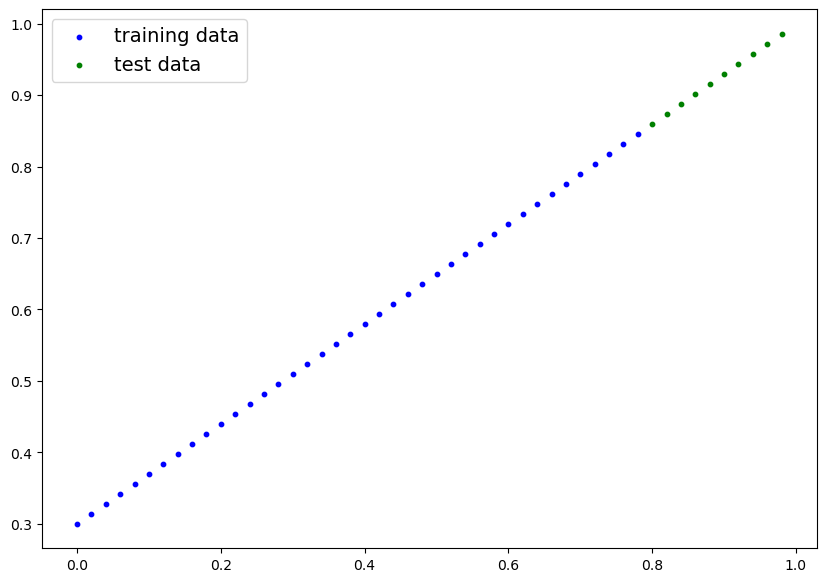

In [7]:
plot_predictions()

## 2. Build model 

Our first PyTorch model

This is very exciting, let's code.....

Because we're going to be building classes throughout the course,
I'd recommend getting familiar with OOP by following resourse from Real Python:https://realpython.com/python3-object-oriented-programming/


What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)


How does it do so?
Through the two main algorithms:
1. Gradient descent
2. Backpropagation

In [8]:
# Create linear regresssion model class
class LinearRegressionModel(nn.Module): # 0> almost everything in pytorch is subset of nn moudle
  def __init__(self):
    super().__init__() # givers access to properties and methods from parent class
    self.weights = nn.Parameter(torch.randn(1, # a rnandom weight and try it to adjust it to the ideal weight
                                            requires_grad=True, # can this parameter be updated via gradient descent
                                            dtype=torch.float))# PyTorch loves the datatype of torch.float32
    self.bias = nn.Parameter(torch.randn(1, # Start with random bias and try to adjust it to the ideal bias
                                         requires_grad=True,# can this parameter be updated via gradient descent
                                         dtype=torch.float))# PyTorch loves the datatype of torch.float32
    
  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # "x" is the input tensor
    return self.weights * x + self.bias # this is linear regression formula

### PyTorch model building essentials

* `torch.nn` - containes all of the building blocks for computational graphs (a neural network is considered as computational graphs)
* `torch.nn.Parameter` - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us.
* `torch.nn.Module` - The base class for all neural network modules, if you subclass it, you should overwrite `forward()`
* `torch.optim` - this where the optimizers  in PyTorch live, they will help with gradient descent
* def `forward()` - All nn.Module subclasses require you to overwrite `forward()`, this method defines what happens in the forward computation.

### Checking the content of our PyTorch model

Now we've created a model, let's see what's inside...

So we can check out our model parameters or what's inside our model using `.parameters()`.

In [9]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List name parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode`

To check our model's predictive power, let's how well it predicts `y_test` based on `X_test`

When we pass data through our model, it's going to run it through the `forward()` method.

In [11]:
# make predictions with model (with torch.no_grad() can also be used)
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

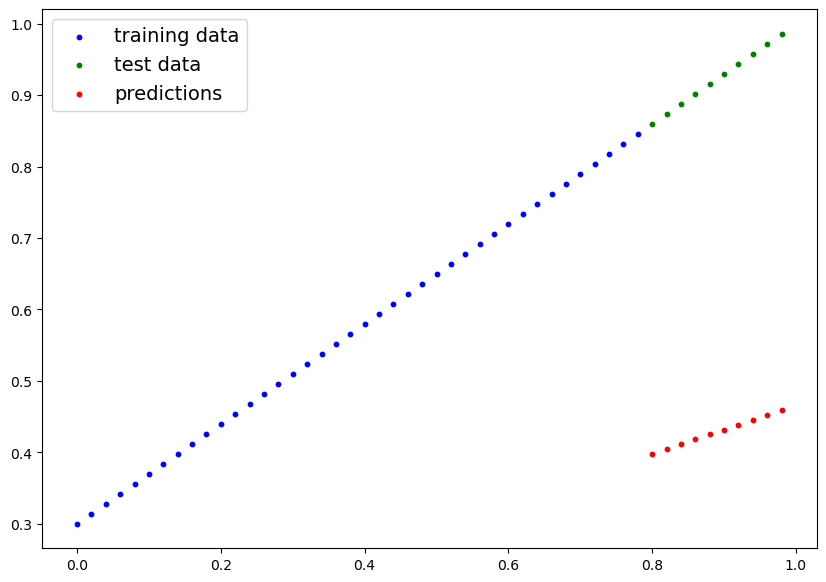

In [12]:
plot_predictions(predictions=y_preds)

### 3. Train model

The whole idea of traning is for a model to move from *unknown* parameters (these may be random) to *known*  parameters.torch

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your model's predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss function:** a function to measure how wrong your model's predictions are with ground truth labels, lower is better.

* **Optimizer:** Takes account the loss of a model and adjusts the model's parameters (e.g weights and biases in our case) to improve the loss function.

And specifically for PyTorch, we need:
* A Training loop
* A testing loop

In [13]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [14]:
# Check out our model's parameters ( a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [15]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(model_0.parameters(),
                           lr=0.01) # learning rate -possibly the most important hyperparameter

**Q**: Which loss function and optimizer should I use?

**A**: This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problem (like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss)

### Building a training loop and testing loop in PyTorch 

A couple of things we need in a training loop: 
0. Loop through the data
1. Forward pass to make predictions on data(this involves data moving through our model's `forward()` functions)
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimize zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss.(**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss.(**gradient descent**)

In [16]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyperparameter because we've set it ourselves)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # train mode in  PyTorch sets all parameters that require gradients to require gradients
    
    # 1. Forward pass
    y_pred = model_0(X_train)
    
    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
        
    # 3, Optimizer zero grad
    optimizer.zero_grad()  
    
    # 4. Perform backpropagation on loss with respex to the parameters of  the model
    loss.backward()
    
    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # by default, how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3
    
    ### Testing
    model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/ batch norm)
    with torch.inference_mode(): # turns off gradient tracking    
        # 1. forward pass
        test_pred = model_0(X_test)
        
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)
    
    # Print out what's happeing
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch}  | Loss: {loss} | Test Loss: {test_loss}")
        
        # Print our model state dict
        print(model_0.state_dict())
    

Epoch: 0  | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10  | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20  | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30  | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40  | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50  | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60  | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor(

In [17]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

Text(0.5, 0, 'Epochs')

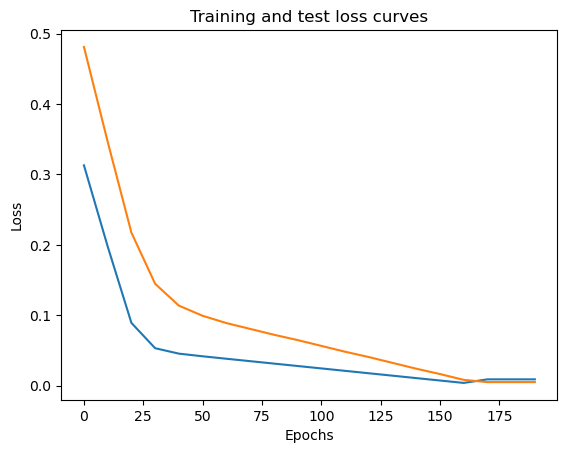

In [18]:
# Plot loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label="Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [19]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

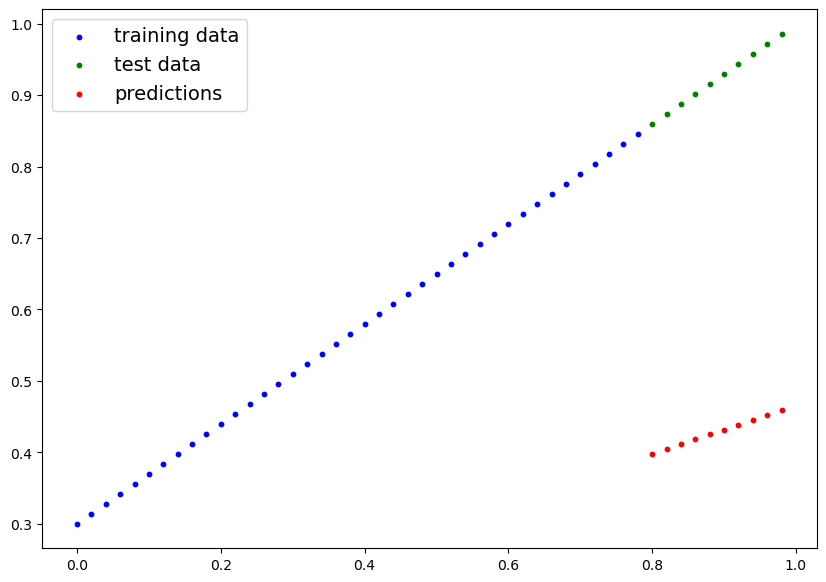

In [20]:
plot_predictions(predictions=y_preds)

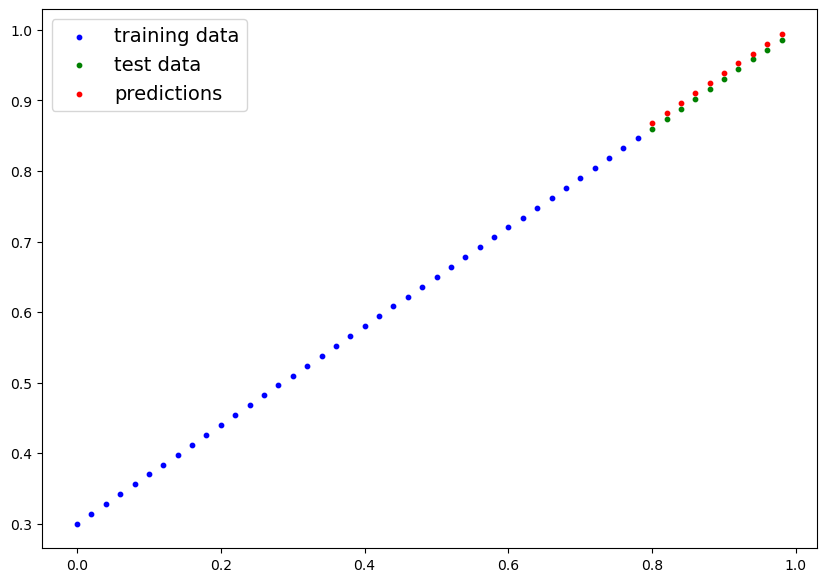

In [21]:
plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch

There are three main methods you should about for saving and loading models in PyTorch.

1. `torch.save()` - allows you save a PyTorch object in Python's picke format
2. `torch.load()` - allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [22]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model's state dict
print(f"Saving model to : {MODEL_SAVE_PATH} ")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to : models\01_pytorch_workflow_model_0.pth 


## Loading a PyTorch model

Since we saved our model's `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the state dict

In [23]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load in the save state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [24]:
# Make some predictions with the loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
  
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [25]:
# Make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
  
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [26]:
# compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back all through the steps above and see it in one place

In [27]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

# check our pytorch version and gpu
torch.__version__, torch.cuda.is_available()

('1.13.0', True)

Create device agnostic code.

this means if we've got access to a GPU, our code will use it (for potientally faster computing).
If GPU is not available, the code will default to using CPU.

In [28]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### 6.1 Data


In [29]:
# Create some data using the linear regression model with y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
X = torch.arange(start=0, end=1, step=0.02).unsqueeze(dim=1)

# Create X and y (features and labels)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [30]:
# Split data
train_split = int(0.8 * len(X))

X_train, y_train, X_test, y_test = X[:train_split, ], y[:train_split], X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test),len(y_test)

(40, 40, 10, 10)

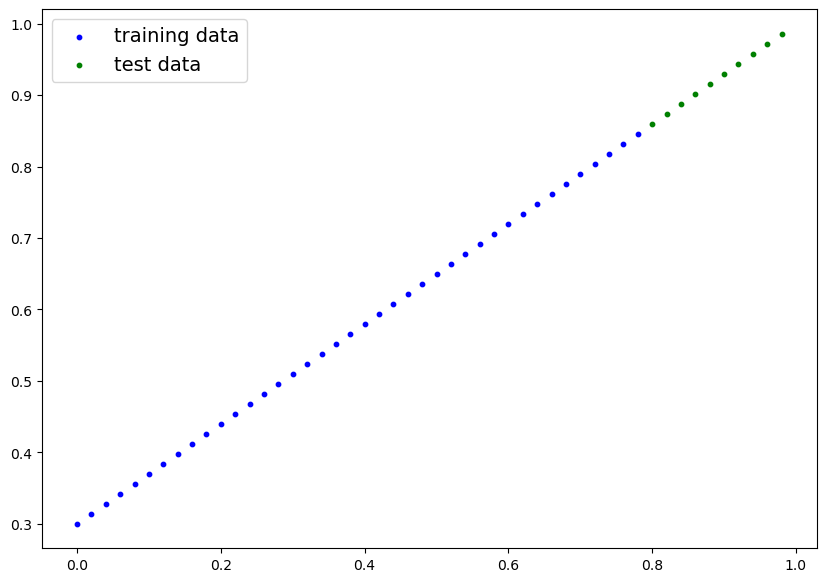

In [31]:
# Plot the data
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Building the PyTorch linear model

In [32]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.linear() for creating the model parameters/ also called: linear layer, probing layer, Dense layer
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
    
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)
  

# Set manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [33]:
# check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [34]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

for training we need:
* Loss function
* optimizer
* Training loop
* Testing loop

In [35]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [36]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200


# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

### Training loop ###
for epoch in range(epochs):
  model_1.train()
  
  # 1. Forward pass
  y_pred = model_1(X_train)
  
  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  
  # 3. Optimiser zero grad
  optimizer.zero_grad()
  
  # 4. perform backpropagation
  loss.backward()
  
  # 5. Optimizer step
  optimizer.step()
  
  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    
    test_loss = loss_fn(test_pred, y_test)
    
  # print out what's happening
  if epoch % 10 == 0:
    print(f" Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

 Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
 Epoch: 10 | Loss: 0.439968079328537 | Test Loss: 0.4392664134502411
 Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
 Epoch: 30 | Loss: 0.20954833924770355 | Test Loss: 0.16984669864177704
 Epoch: 40 | Loss: 0.09433845430612564 | Test Loss: 0.03513690456748009
 Epoch: 50 | Loss: 0.023886388167738914 | Test Loss: 0.04784907028079033
 Epoch: 60 | Loss: 0.019956795498728752 | Test Loss: 0.045803118497133255
 Epoch: 70 | Loss: 0.016517987474799156 | Test Loss: 0.037530567497015
 Epoch: 80 | Loss: 0.013089174404740334 | Test Loss: 0.02994490973651409
 Epoch: 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
 Epoch: 100 | Loss: 0.006215683650225401 | Test Loss: 0.014086711220443249
 Epoch: 110 | Loss: 0.00278724217787385 | Test Loss: 0.005814164876937866
 Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
 Epoch: 130 | Loss: 0.0012645035749301314 | Test Loss: 0.0

In [37]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

### 6.4 Making and evaluating predictions


In [38]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

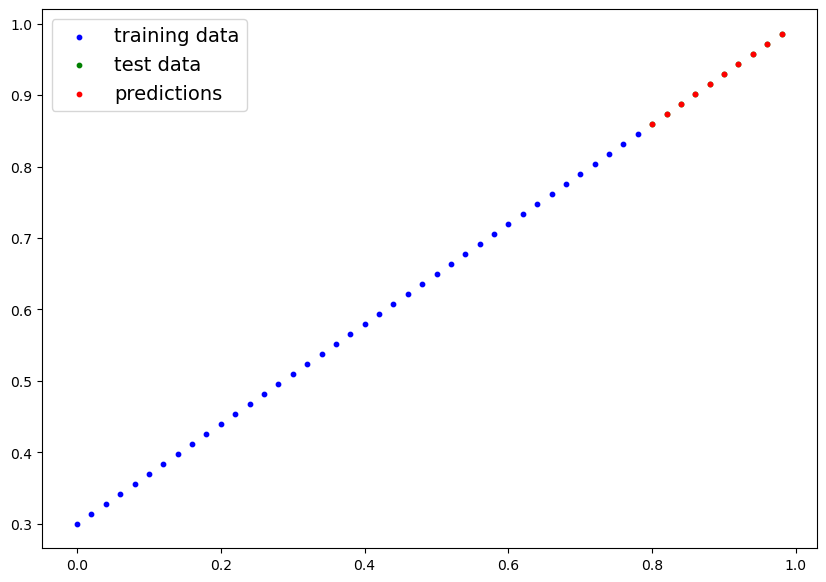

In [40]:
# Check out our model's predictions visually 
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving & loading a trained model

In [46]:
from pathlib import Path

# Create model's directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model's save path
MODEL_NAME = '01_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save model's state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model_1.pth


In [48]:
# Load a model

# Create a new instance of linear regression model v2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [49]:
# Evaluate loaded model 
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')